In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE=224
BATCH_SIZE=32

In [45]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [46]:
train_generator=train_datagen.flow_from_directory (
    '/content/drive/MyDrive/Alzheimer_s Dataset/train',
  target_size=(IMG_SIZE,IMG_SIZE),
  batch_size=BATCH_SIZE,
  class_mode='categorical',
  subset='training')

Found 4098 images belonging to 4 classes.


In [47]:
val_generator=train_datagen.flow_from_directory("/content/drive/MyDrive/Alzheimer_s Dataset/train",
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='validation')

Found 1023 images belonging to 4 classes.


In [48]:
class_indices=train_generator.class_indices
class_name=list(class_indices.keys())
print("Class_indices",class_indices)
print("Class_name",class_name)

Class_indices {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
Class_name ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [49]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 333s 3s/step - accuracy: 0.5633 - loss: 0.9638 - val_accuracy: 0.4203 - val_loss: 1.1733
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - accuracy: 0.7421 - loss: 0.6209 - val_accuracy: 0.5327 - val_loss: 1.2328
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.8975 - loss: 0.2780 - val_accuracy: 0.5503 - val_loss: 1.3695
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.9555 - loss: 0.1318 - val_accuracy: 0.6100 - val_loss: 1.2274
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.9851 - loss: 0.0416 - val_accuracy: 0.6999 - val_loss: 1.3151


In [54]:
model.save('/content/drive/MyDrive/Colab Notebooks/brain_test.h5')
print("Model Saved")

Model Saved


In [55]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model("/content/drive/MyDrive/Colab Notebooks/brain_test.h5")
print("Model Loaded")

Model Loaded


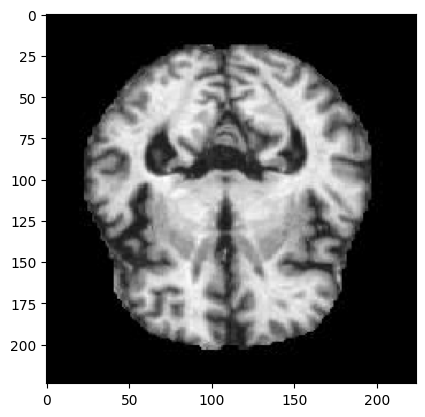

In [59]:
test_image_path="/content/drive/MyDrive/Alzheimer_s Dataset/train/ModerateDemented/moderateDem1.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [60]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=225.

In [61]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_name[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
ModerateDemented
